# Regression 실습 - Bike Sharing Demand

## 데이터 탐색 및 전처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* 데이터 적재

In [2]:
bike_df = pd.read_csv(
    "C:/Users/edu/Documents/GitHub/SBA2020_machineLearning/datasets/bike_train.csv"
)
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
bike_df.shape

(10886, 12)

* 훑어보기

In [4]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

* 결측치 및 데이터 타입 등 확인

In [5]:
bike_df.info()

# datetime만 타입이 object라서 datetime타입으로 바꿔주고자 한다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

* 문자열을 datetime 타입으로 변경

In [7]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
# 함수를 apply를 통해 적용시킬 수 있다


# bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
# bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
# bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
# bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


* 변경된 것 확인

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


* datetime 타입에서 년, 월, 일, 시간 추출

In [11]:
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

# 이렇게 lambda식을 apply를 통해 한다
# x의 속성으로 year, month등을 가져온다
# datetime이라는 자료형의 year, month, day, hour
# 그러면 열이 4개가 더 추가 된다

* 변경된 것 확인

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

* 변경된 정보로 훑어보기

In [13]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


* 열삭제 (datetime, casual, registered)

In [15]:
bike_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
bike_df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


In [16]:
bike_df.shape

(10886, 13)

In [17]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


* X와 y로 특성값과 타깃값 분리

In [19]:
y_target = bike_df['count']
y_target
# X_features = bike_df.drop(['count'], axis=1, inplace= True)
# X_features
# 이렇게 inplace = True 라고 놓으면 원본 데이터가 변경되는 바람에 밑에까지 에러가 난다.

X_features = bike_df.drop(['count'], axis=1, inplace=False)
# 드롭할 column명을 지정해주고, 드롭 할 축인 열을 지정해주고, False로 해야 원본은 건드리지 않고 사용할 수 있다.
X_features

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


* 훈련세트와 테스트 세트 분리

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = X_features
y = y_target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이건 무작위 테스트 데이터 스플릿이다.



# 여기에서 추가로 교차검증 해주면 좋다
# 교차검증 하는 것으로 바꿔보자
# 하지만 rmsle는 교차검증에 없어서 이 예제의 경우 하지 말자

* 선형 모델 훈련과 예측

In [24]:
from sklearn.linear_model import LinearRegression

#### 모델 생성
lr_reg = LinearRegression()
#### 훈련
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)  ##예측
pred

array([319.08851233, 250.72127352, 241.69599609, ..., 218.60167065,
       255.33286927, 130.85159033])

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

* RMSLE

In [27]:
bike_rmsle = rmsle(y_test, pred)
bike_rmsle

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


1.1638915261996352

* RMSE

In [28]:
bike_mse = mean_squared_error(y_test, pred)
bike_rmse = np.sqrt(bike_mse)
bike_rmse

140.60806707584595

140.89958867165592

* MAE

In [29]:
bike_mae = mean_absolute_error(y_test, pred)
bike_mae

105.61836706339017

105.92444835101158

In [35]:
# evaluate_regr(y_test, pred)

# 이건?

* 예측과 실제 값 확인해 보기(top 5)

In [31]:
result_df = pd.DataFrame()
result_df['real_count']=#### y test 값
result_df['predicted_count']= #### pred 한 값
result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
result_df.sort_values(by='diff', ascending=False)[:5]

,real_count,predicted_count,diff
1618,890,322.0,568.0
3151,798,241.0,557.0
966,884,327.0,557.0
412,745,194.0,551.0
2817,856,310.0,546.0


In [60]:
result_df = pd.DataFrame()
# y test 값
result_df['real_count'] = y_test
# 또는 y_test.values라고 넣어줘도 된다
# 실제 y_test와 pred와 비교해줘야 하는 것이다 

# pred 한 값
result_df['predicted_count'] = pred
# 소수점 나온다면 np.round 사용하자

result_df['diff'] = np.abs(result_df['real_count'] -
                           result_df['predicted_count'])
result_df.sort_values(by='diff', ascending=False)[:5]

,real_count,predicted_count,diff
8313,5.627621,463.286472,457.658851
8314,5.662960,461.818640,456.155680
8316,5.308268,457.980405,452.672137
8555,6.059123,454.537366,448.478243
8554,6.306275,454.771942,448.465667


* 전체 y 타깃값의 분포 확인 (histogram)

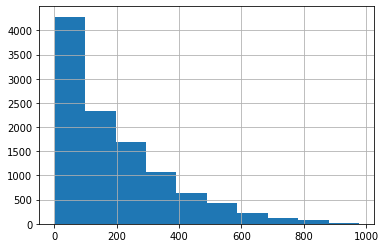

In [34]:
# y타깃 값으로 히스토그램을 그려보자

y_target.hist()
# 꼬리가 긴 형태로 나오는데 이건 왜곡되어 있다고 본다
# 그래서 로그함수 써준다 정규분포 형으로 만들기 위해

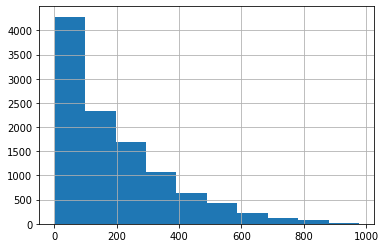

* y 타깃값 로그변환하기

In [38]:
y_target_log = np.log(y_target)

* 변환된 y 타깃값의 분포 확인 (histogram)

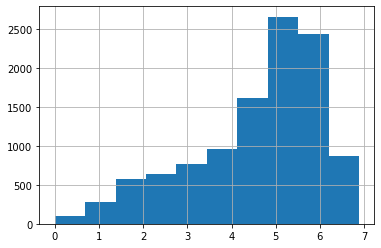

In [39]:
y_target_log.hist()

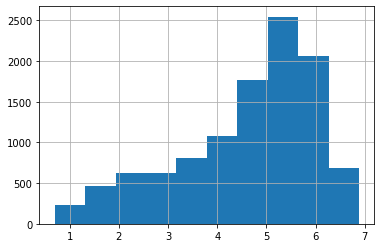

* 타겟 컬럼인 count 값을 log1p 로 Log 변환

In [175]:
y_target_log = np.log1p(y_target)
# 무한대로 가는 값을 피하기 위해 log1p써준다 


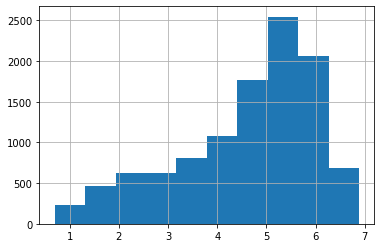

In [91]:
y_target_log.hist()

* 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    y_target_log,
                                                    test_size=0.3,
                                                    random_state=0)

#### 모델 생성
lr_reg_log = LinearRegression()
#### 훈련
lr_reg_log.fit(X_train, y_train)
pred = lr_reg_log.predict(X_test)  ##예측

# 원본이 아닌 타깃값이 로그변환된 것으로 예측 한 것이다.

* 예측하기전 expm1를 이용하여 y_test와 pred를 원래 scale로 변환

In [62]:
# exp을 불러서 로그 값을 되돌린다. 이것을 가지고 성능평가를 할 것이다

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

* RMSLE

In [63]:
bike_rmsle_log = rmsle(y_test_exp, pred_exp)
bike_rmsle_log

# rmsle(y_test_exp, pred_exp)라고만 써도 값 출력된다
# 값이 좀 더 좋아졌다

1.0168265982003433

* RMSE

In [65]:
bike_mse_log = mean_squared_error(y_test_exp, pred_exp)
bike_rmse_log = np.sqrt(bike_mse_log)
bike_rmse_log

162.5942680900463

* MAE

In [66]:
bike_mae_log = mean_absolute_error(y_test_exp, pred_exp)
bike_mae_log

109.28615860077534

* 각 특성의 가중치(lr_reg.coef_) 확인하기 (sns.barplot 이용)

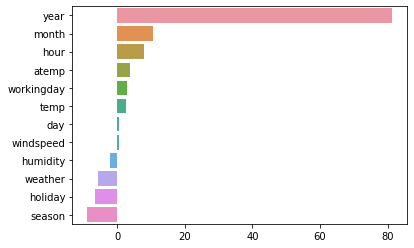

In [93]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)

sns.barplot(x=coef_sort.values, y=coef_sort.index)

# 연도가 다른 애들보다 숫자가 커서 이렇게 크게 나온 것 같다

* 범주형 특성들 one-hot encoding ('year','month','hour','season','weather')

In [103]:
bike_df.shape

(10886, 13)

In [104]:
X_features.shape

(10886, 12)

In [105]:
X_features_ohe = pd.get_dummies(
    X_features, columns=['year', 'month', 'hour', 'season', 'weather'])

In [106]:
X_features_ohe.shape

(10886, 53)

In [107]:
display(X_features_ohe.head(10))

,holiday,workingday,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,...,hour_22,hour_23,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
5,0,0,9.84,12.880,75,6.0032,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
6,0,0,9.02,13.635,80,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
7,0,0,8.20,12.880,86,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
8,0,0,9.84,14.395,75,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
9,0,0,13.12,17.425,76,0.0000,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0


* 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

## 모델 선택과 훈련, 예측

* LinearRegression()

In [109]:
#### 모델 생성
lr_reg_ohe = LinearRegression()

#### 훈련
lr_reg_ohe.fit(X_train, y_train)

pred = lr_reg_ohe.predict(X_test)  ##예측

In [110]:
lr_y_test = np.expm1(y_test)
lr_pred = np.expm1(pred)

* RMSLE

In [111]:
bike_rmsle_ohe = rmsle(lr_y_test, lr_pred)
bike_rmsle_ohe

0.5888895783274644

* RMSE

In [112]:
bike_mse_ohe = mean_squared_error(lr_y_test, lr_pred)
bike_rmse_ohe = np.sqrt(bike_mse_ohe)
bike_rmse_ohe

97.48313720297838

97.48424000732946

* MAE

In [113]:
bike_mae_ohe = mean_absolute_error(lr_y_test, lr_pred)
bike_mae_ohe

63.10575355866219

63.105890572524636

* Ridge()

In [160]:
from sklearn.linear_model import Ridge

#### 모델 생성
ridge = Ridge(alpha=10).fit(X_train, y_train)
#### 훈련
pred = ridge.predict(X_test)  ##예측

## 릿지 GridSearchCV

In [185]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = { 'alpha' : [0, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_log_error' )

grid_search_ridge.fit(X_features_ohe, y_target_log)

# 교차검증 사용시 로그를 exp해줄 필요 없다. 알아서 해주는 것 같다



GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [193]:
grid_search_ridge.best_params_

# 알파 값이 0.1일때 최적이라고 나온다

{'alpha': 0.1}

In [194]:
grid_search_ridge.best_score_

-0.02116065419613571

In [187]:
np.sqrt(-grid_search_ridge.best_score_)
# 위에서 구한 rmsle보다 더 줄어들었다

0.1454670209914801

In [153]:
ridge_y_test = np.expm1(y_test)
ridge_pred = np.expm1(pred)

* RMSLE

In [138]:
rmsle(ridge_y_test, ridge_pred)

0.589478618032062

0.5894752171687988

* RMSE

In [139]:
np.sqrt(mean_squared_error(ridge_y_test, ridge_pred))

98.4028040102619

* MAE

In [140]:
mean_absolute_error(ridge_y_test, ridge_pred)

63.64584210859766

* Ridge - GridSearchCV 로 최적의 하이퍼 파라미터 탐색

In [ ]:
alphas = [0, 0.1, 1, 10, 100]
Ridge()
GridSearchCV(Ridge(), )

* Lasso()

In [151]:
from sklearn.linear_model import Lasso

#### 모델 생성
lasso = Lasso(alpha=0.01)
#### 훈련
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)  ##예측

## 라쏘 GridSearchCV

In [188]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid_lasso  = { 'alpha' : [0.07, 0.1, 0.5, 1, 3]}

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv = 5, scoring='neg_mean_squared_log_error')

grid_search_lasso.fit(X_features_ohe, y_target_log)



GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.07, 0.1, 0.5, 1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [191]:
grid_search_lasso.best_params_

{'alpha': 0.07}

In [192]:
grid_search_lasso.best_score_

-0.07406831118510615

In [190]:
np.sqrt(-grid_search_lasso.best_score_)

0.27215493966692234

In [142]:
lasso_y_test = np.expm1(y_test)
lasso_pred = np.expm1(pred)

* RMSLE

In [143]:
rmsle(lasso_y_test, lasso_pred)

0.6343883729764169

0.6343885661945594

* RMSE

In [144]:
np.sqrt(mean_squared_error(lasso_y_test, lasso_pred))

113.0308860287981

113.03085220528483

* MAE

In [145]:
mean_absolute_error(lasso_y_test, lasso_pred)

72.6582417615762

72.65823233429542

* 각 특성의 가중치(lr_reg.coef_) 확인하기 (sns.barplot 이용)

In [148]:
coef = pd.Series(ridge.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)

sns.barplot(x=coef_sort.values, y=coef_sort.index)

ValueError: Length of passed values is 53, index implies 12.

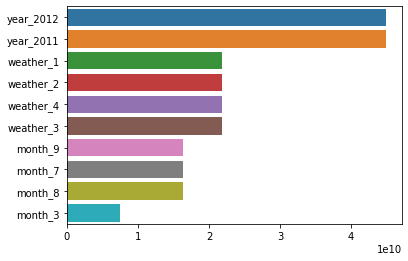

* 더 시도해볼만한 예측기가 있다면 추가!